In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [69]:
file = os.path.join("Autism_Data_Adult_Version-2.csv")
asdDF = pd.read_csv(file)
pd.set_option('display.max_columns', None)
asdDF.head()


,Case No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex,Ethnicity,Jaundice,Family_ASD,Residence,Used_App_Before,Score,Screening Type,Language,User,Class
0,6,0,0,0,0,0,0,0,0,0,0,27,f,white,no,no,Russia,no,0,17 and more,russian,parent,NO
1,10,1,1,1,1,1,1,1,1,1,1,21,f,white,no,no,Germany,no,10,17 and more,english,self,YES
2,12,1,1,0,1,1,0,0,1,0,0,18,m,black,no,no,United States,no,5,17 and more,english,self,NO
3,16,1,0,0,0,1,1,1,1,1,1,49,m,black,no,no,Mexico,no,7,17 and more,french,self,YES
4,20,1,1,1,0,0,0,0,1,0,0,18,m,aboriginal,no,no,Indonesia,no,4,17 and more,english,self,NO


In [70]:
X = pd.get_dummies(asdDF.drop(["Class", "Case No"], axis=1))
# keeping just the columns that has 1% importance or higher based off the importance from RandomForestTesting.ipynb

# X = X[["Score", "A9", "A6", "A5", "A4", "A3", "A10", "A7", "A2", "Age", "A1", "A8"]]
X = X[["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9","A10", "Age"]]
y = asdDF["Class"]
X.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age
0,0,0,0,0,0,0,0,0,0,0,27
1,1,1,1,1,1,1,1,1,1,1,21
2,1,1,0,1,1,0,0,1,0,0,18
3,1,0,0,0,1,1,1,1,1,1,49
4,1,1,1,0,0,0,0,1,0,0,18


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [72]:
rf = RandomForestClassifier(n_estimators=13)
rf = rf.fit(X_train, y_train)
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(f'Training Score: {rf_train_score}')
print(f'Testing Score: {rf_test_score}')

Training Score: 1.0
Testing Score: 0.9857142857142858


In [73]:
importances = rf.feature_importances_
sorted(zip(rf.feature_importances_, X), reverse=True)

[(0.2629921773240081, 'A9'),
 (0.11635273651730058, 'A6'),
 (0.1088605766152463, 'A5'),
 (0.10610938194556657, 'A3'),
 (0.07887920264470055, 'A4'),
 (0.0710561562095561, 'Age'),
 (0.0652397122954208, 'A7'),
 (0.05045452959853246, 'A10'),
 (0.048134685963743346, 'A1'),
 (0.04780830650918834, 'A2'),
 (0.044112534376736866, 'A8')]

(0, 23)

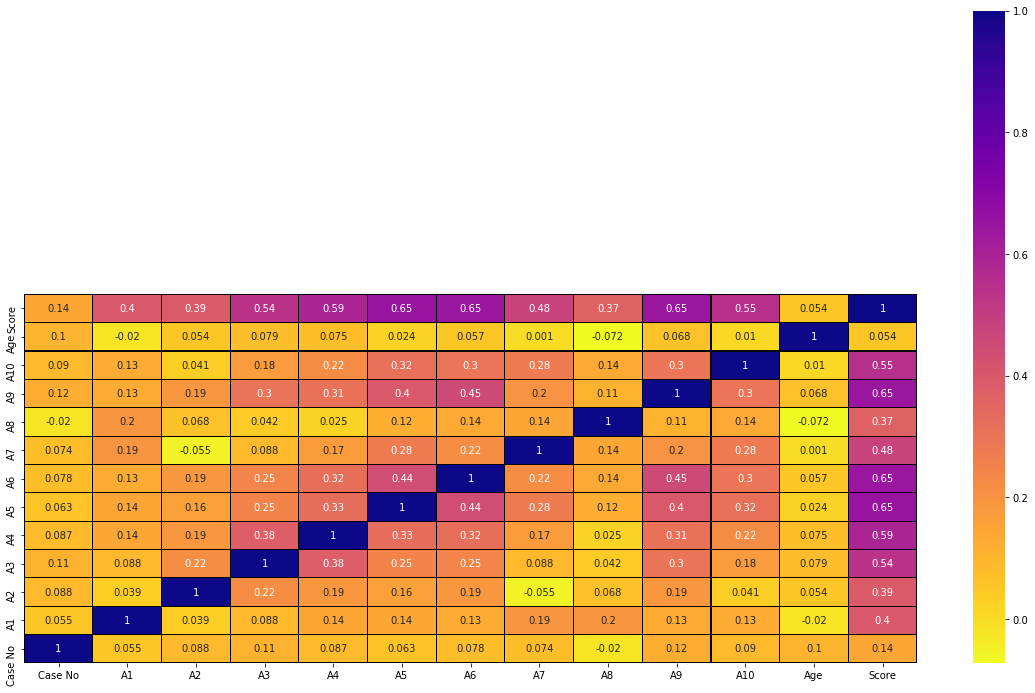

In [65]:
# need to play around more with what columns from asdDF to keep and how big the y_lim is.
corrmat = asdDF.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,12))
ax=sns.heatmap(asdDF[top_corr_features].corr(),annot=True, cmap="plasma_r", linewidths=.1,
              linecolor='black')
ax.set_ylim(0, 23)

In [66]:
#set up variables to determine if folks who answered "Slightly Disagree" and "Definietly Disagree" (the answers that 
# corespond with it being an ASD trait) are more likely to have the class of Yes for being autistic.

totalPeople = asdDF["Class"].count() #1118
ASDy = asdDF[asdDF.Class=="YES"]
ASDyCount = ASDy["Class"].count() #358 
ASDyA9Count = ASDy[ASDy["A9"]==1]["A9"].count() #284
totalA9Count = asdDF[asdDF["A9"]==1]["A9"].count()

# YestoA9andASD = ASDyA9Count/totalA9Count
# percentASD = ASDyCount/totalPeople
# print(f'Yes and Yes : {YestoA9andASD}. Percent ASD: {percentASD}')

In [67]:
from statsmodels.stats.proportion import proportions_ztest
count = ASDyA9Count
nobs = totalA9Count
value = ASDyCount/totalPeople
stat, pval = proportions_ztest(count, nobs, value)
#print('{0:0.3f}'.format(pval))
pval

5.984858034448194e-59

In [9]:
# with small pval, we reject the null, so there is evidence to show that if someone answers yes to question A9, 
# they truly have a higher rate of Autism.